<h1>AI GENIE CAPSTONE ML PROJECT</h1>

Importing the required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading and obesrving the data

In [4]:
df = pd.read_csv("movie.csv",encoding="ISO-8859-1")
df.head()

,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession,rating
0,10000,Amor gitano,ES,NaN,1910,NaN,NaN,8,Segundo de Chomón,director,1871.0,1929.0,"director,cinematographer,writer",5.6
1,10001,As in a Looking Glass,US,NaN,1911,NaN,Drama,28,Wilfred Lucas,actor,1871.0,1940.0,"actor,director,writer",5.1
2,10002,The Infant at Snakeville,US,NaN,1911,NaN,NaN,5,Gilbert M. Broncho Billy Anderson,actor,1880.0,1971.0,"director,actor,producer",5.2
3,10003,Who Will Marry Mary?,US,NaN,1913,NaN,"Action,Adventure",14,Mary Fuller,actress,1888.0,1973.0,"actress,writer",5.6
4,10004,The Active Life of Dolly of the Dailies,US,NaN,1914,NaN,Drama,43,Mary Fuller,actress,1888.0,1973.0,"actress,writer",6.2


In [3]:
df.shape ##to find the size of the dataset

(18166, 14)

This is used to see the null value count and description of data

In [6]:
for column in df.columns:
   print(column, df[column].isnull().sum())
print(df.describe())

movie_id 0
movie 0
region 0
language 14595
release_year 0
duration_in_min 970
genres 602
numvotes 0
primaryname 0
role 0
birthyear 1666
deathyear 7208
primaryprofession 94
rating 100
           movie_id  release_year  duration_in_min      numvotes  \
count  18166.000000  18166.000000     17196.000000  1.816600e+04   
mean   19082.500000   1963.769404        89.285066  2.603955e+03   
std     5244.216831     23.172771        26.648045  2.800400e+04   
min    10000.000000   1897.000000        14.000000  5.000000e+00   
25%    14541.250000   1944.000000        76.000000  2.200000e+01   
50%    19082.500000   1967.000000        89.000000  7.700000e+01   
75%    23623.750000   1985.000000        98.000000  3.400000e+02   
max    28165.000000   2019.000000      1428.000000  1.546898e+06   

          birthyear     deathyear        rating  
count  16500.000000  10958.000000  18066.000000  
mean    1924.724727   1984.794944      5.974626  
std       24.676553     22.148750      1.103099  
min 

Since <b> Language</b> has many null values and <b> movie name </b> cannot provide any value removing them from the dataset

In [8]:
df.drop("language",axis=1,inplace=True)
df.drop("movie",axis=1,inplace=True)
df.head()

,movie_id,region,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession,rating
0,10000,ES,1910,NaN,NaN,8,Segundo de Chomón,director,1871.0,1929.0,"director,cinematographer,writer",5.6
1,10001,US,1911,NaN,Drama,28,Wilfred Lucas,actor,1871.0,1940.0,"actor,director,writer",5.1
2,10002,US,1911,NaN,NaN,5,Gilbert M. Broncho Billy Anderson,actor,1880.0,1971.0,"director,actor,producer",5.2
3,10003,US,1913,NaN,"Action,Adventure",14,Mary Fuller,actress,1888.0,1973.0,"actress,writer",5.6
4,10004,US,1914,NaN,Drama,43,Mary Fuller,actress,1888.0,1973.0,"actress,writer",6.2


Since <b>death year</b> has too many outliers and less corelation  removing it 

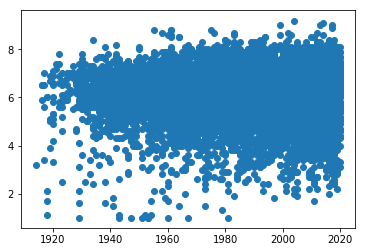

,movie_id,release_year,duration_in_min,numvotes,birthyear,deathyear,rating
movie_id,1.000000,0.049367,0.025364,-0.003768,0.048272,0.030052,0.005050
release_year,0.049367,1.000000,0.270459,0.076619,0.879341,0.665616,-0.080427
duration_in_min,0.025364,0.270459,1.000000,0.102347,0.249781,0.149194,0.125705
numvotes,-0.003768,0.076619,0.102347,1.000000,0.079858,0.031762,0.111679
birthyear,0.048272,0.879341,0.249781,0.079858,1.000000,0.759378,-0.097993
deathyear,0.030052,0.665616,0.149194,0.031762,0.759378,1.000000,-0.044930
rating,0.005050,-0.080427,0.125705,0.111679,-0.097993,-0.044930,1.000000


In [64]:
x,y=df["deathyear"],df["rating"]
plt.scatter(x,y)
plt.show()
df.corr()

In [12]:
df.drop("deathyear",axis=1,inplace=True)
df.head()

,movie_id,region,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,primaryprofession,rating
0,10000,ES,1910,89.0,unknown,8,Segundo de Chomón,director,1871.0,"director,cinematographer,writer",5.6
1,10001,US,1911,89.0,Drama,28,Wilfred Lucas,actor,1871.0,"actor,director,writer",5.1
2,10002,US,1911,89.0,unknown,5,Gilbert M. Broncho Billy Anderson,actor,1880.0,"director,actor,producer",5.2
3,10003,US,1913,89.0,"Action,Adventure",14,Mary Fuller,actress,1888.0,"actress,writer",5.6
4,10004,US,1914,89.0,Drama,43,Mary Fuller,actress,1888.0,"actress,writer",6.2


Filling all the null values with respective data 

In [14]:
df["duration_in_min"].fillna(value = df["duration_in_min"].median(),inplace=True)
df["birthyear"].fillna(value = df["birthyear"].median(),inplace=True)
df["genres"].fillna(value ="unknown",inplace=True)
df["primaryprofession"].fillna(value = "unknown",inplace=True)
df.head()

,movie_id,region,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,primaryprofession,rating
0,10000,ES,1910,89.0,unknown,8,Segundo de Chomón,director,1871.0,"director,cinematographer,writer",5.6
1,10001,US,1911,89.0,Drama,28,Wilfred Lucas,actor,1871.0,"actor,director,writer",5.1
2,10002,US,1911,89.0,unknown,5,Gilbert M. Broncho Billy Anderson,actor,1880.0,"director,actor,producer",5.2
3,10003,US,1913,89.0,"Action,Adventure",14,Mary Fuller,actress,1888.0,"actress,writer",5.6
4,10004,US,1914,89.0,Drama,43,Mary Fuller,actress,1888.0,"actress,writer",6.2


Using <b>Label encoding </b> for coverting into numerical data

In [16]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df["role"]= label_encoder.fit_transform(df["role"])
df["primaryname"]= label_encoder.fit_transform(df["primaryname"])
df["region"]=label_encoder.fit_transform(df["region"])
df["primaryprofession"]=label_encoder.fit_transform(df["primaryprofession"])
df["genres"]=label_encoder.fit_transform(df["genres"])
df.head()

,movie_id,region,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,primaryprofession,rating
0,10000,7,1910,89.0,604,8,8143,5,1871.0,404,5.6
1,10001,20,1911,89.0,424,28,9264,0,1871.0,66,5.1
2,10002,20,1911,89.0,604,5,3126,0,1880.0,389,5.2
3,10003,20,1913,89.0,1,14,6091,1,1888.0,318,5.6
4,10004,20,1914,89.0,424,43,6091,1,1888.0,318,6.2


Seperating the un rated movie column from the rest data set

In [20]:
newli=df[df['rating'].isnull()]
newli.head()

print(newli.shape)

(100, 11)


Removing them from the training data set


In [24]:
df.dropna(axis=0,inplace=True)
df.shape

(18066, 11)

In [27]:
newli.drop("rating",axis=1,inplace=True)



In [28]:
print(newli.shape)
newli.head()

(100, 10)


,movie_id,region,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,primaryprofession
114,10114,8,1934,86.0,424,2737,8618,0,1899.0,0
294,10294,7,1950,98.0,424,403,2357,1,1922.0,296
474,10474,3,1972,110.0,279,9396,7730,0,1936.0,475
655,10655,23,1989,90.0,47,6,9172,0,1925.0,0
835,10835,20,1935,58.0,14,27,3874,0,1896.0,168


Consider Y to be target in training data

In [29]:
y=df["rating"]

y.shape

(18066,)

In [30]:
df.drop("rating",axis=1,inplace=True)
X=df
X.head()

,movie_id,region,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,primaryprofession
0,10000,7,1910,89.0,604,8,8143,5,1871.0,404
1,10001,20,1911,89.0,424,28,9264,0,1871.0,66
2,10002,20,1911,89.0,604,5,3126,0,1880.0,389
3,10003,20,1913,89.0,1,14,6091,1,1888.0,318
4,10004,20,1914,89.0,424,43,6091,1,1888.0,318


We will take <b>80% </b> for training data and <b>20% </b>for testing data

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

Here i am using <b>Random forest Regressor</b> as my algorithm to train
I have given <b>100 </b>estimatores with random selection

In [34]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 500, random_state = 45)
regressor.fit(xtrain, ytrain) 
yhat=regressor.predict(xtest)

Evaluating my model using <b>Mean squared error </b> and <b>r2 score</b>

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,yhat)

0.8145802955174322

In [36]:
from sklearn.metrics import r2_score
r2_score(ytest,yhat)

0.2924285260299019

predicting data for result samples

In [ ]:
result=regressor.predict(newli)

In [40]:
len(result)

100

Combing the result and uploading to a csv file 

In [61]:
joinlist = newli['movie_id'].tolist()
output= pd.DataFrame()
output['Movie_id']  = joinlist
output['rating']  = result
print(output.shape)
output.to_csv("result1.csv")

(100, 2)


<h3>END</h3>